<a href="https://colab.research.google.com/github/fuyipao/Determine-the-key-factors-leading-to-motor-vehicle-accidents-in-California/blob/main/Automobile_pricefactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:

# Homework 1 (Total 100 points)

## Q1. Load and examine the `Auto.csv` dataset from the Blackboard course site. **(20 points total)**

1. Should you drop any variable from regression analysis and why? (5 points)
2. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf): 
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name

##<font color=Blue> A1.

In [ ]:
#Importing the Modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')
data_folder='/content/drive/MyDrive/BA810/Data/'
#Load Data
auto=pd.read_csv('/content/drive/MyDrive/BA810/Data/Auto.csv')

Mounted at /content/drive


In [ ]:
#Explore Data
auto.info()
auto.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [ ]:
#Deal with horsepower error
auto.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
#Delete ?
auto=auto[auto.horsepower != '?']
#Change type
auto.horsepower =auto.horsepower.astype('float')
auto.cylinders =auto.cylinders.astype('float')
#explore again
auto.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1. I suggest dropping only the "name" column. The reasons are as follows. 

As the data exploration phase shows, the columns included in the dataset are "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin",and "name". And from the column definition, we can conclude that variables like cylinders or horsepower can demonstrate the performance of each automobile, and "year" or "origin" can tell the vehicles' original features. However, the "name" column is an unique index that gives limited information to the dependent variable, "mpg". Even though "name" columns may indicate car brands, the features of each car can differ from the same brand. Thus, we can drop the "name "column and use other more specific variables.   

2. Categorical vaiables are "origin", "cylinders", and "year"; Others are measurable numeric variables, including "mpg","displacement", "horsepower", "weight", and "acceleration".  

To explain, categorical variables tend to be multi-valued discrete, and they acts more like labels than numeric calculations. For example, the average of "cylinders" may be 4.5, which is not informative since there's no such type as 4.5 cylinders. Not to speak of "origin", countries should only acts as type label. As for the "year" column, it confused me to whether put it in the numeric or categorical variables, but considering the ratio between years is not meaningful which is why its not appropriate to classify it as a quantitative variable.

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

##<font color=Blue> A2

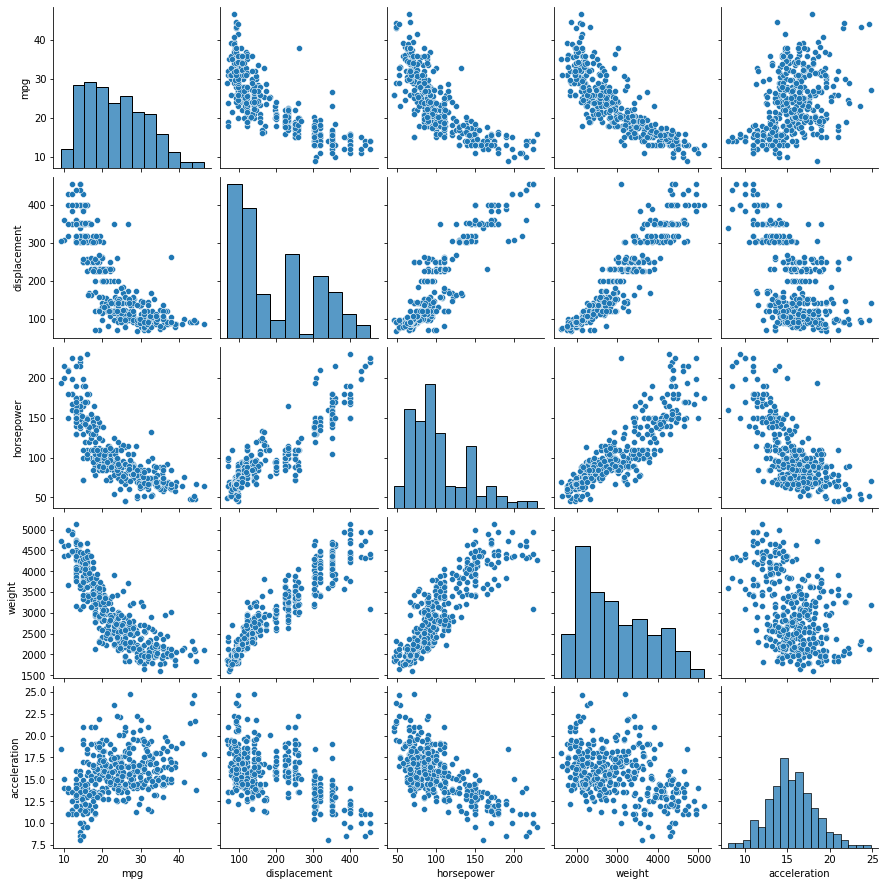

In [ ]:
#Drop Columns
auto_numeric=auto.drop(columns=['cylinders','year','origin'])
# Create the default pairplot
sns.pairplot(auto_numeric)

From the scatter plots and histograms of the numeric variables, some linear relationship can be oberserved, such as positive relationship between weight and displacement, and negative relationship between mpg and weight. The following provides a closer observation of these two examples.

,displacement,weight
displacement,1.000000,0.932994
weight,0.932994,1.000000


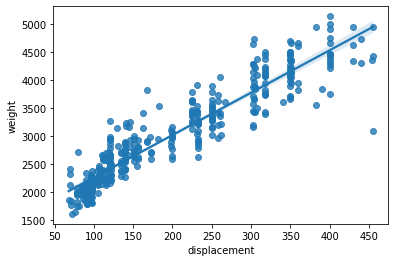

In [ ]:
# weight vs displacement
sns.regplot(x="displacement", y="weight", data=auto_numeric)
auto[["displacement", "weight"]].corr()

Weight and displacement show high positive correlation with 0.93 correlation coefficient. It can be easily explained by the fact that higher displacement can deal with higher amount of air in an effort to combine it with fuel, ignite, and produce power. Thus, heavier automobiles tend to require higher displacements to display its functions and carry its body.

,mpg,weight
mpg,1.000000,-0.832244
weight,-0.832244,1.000000


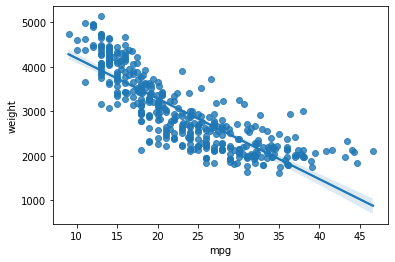

In [ ]:
# weight vs mpg
sns.regplot(x="mpg", y="weight", data=auto_numeric)
auto[["mpg", "weight"]].corr()

On the other hand, weight and mpg show high negative correlation with -0.83 correlation coefficient. The observation also meets our common belief that miles per gallon will decrease if a car is heavier. In other words, heavier body of vehicle tends to give more pressure on its engine, causing worse performances and higher fuel consumption.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

##<font color=Blue> A3.

In [ ]:
#corr
auto_numeric.corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


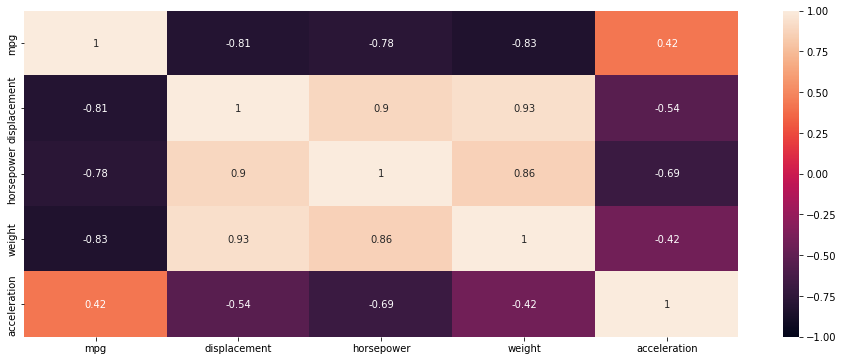

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(auto_numeric.corr(),vmin=-1, vmax=1, annot=True)

From the heatmap and matrix, we can conclude that there are two positive and four negative correlations between variables. To be more specific, for positive relationships: one is highly correlated and the other is close to low related; for negative correlation, two of them are highly related while others show middle relation. 

Aside from the two significant correlations mentioned previously, we now discuss why "acceleration" lean demonstrates low relations with other factors. Acceleration depends more on the rotational speed of its engine and can be varied by acquired factors, thus it is reasonable that horsepower, a factor related to the engine, shows comparatively higher correlation. 

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

##<font color=Blue> A4.

In [ ]:
#import statsmodels package
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Variables
Y=auto['mpg']
X=auto.drop(['mpg','name'],axis=1)
X=pd.get_dummies(X, columns=["origin"])
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,8.0,307.0,130.0,3504,12.0,70,1,0,0
1,8.0,350.0,165.0,3693,11.5,70,1,0,0
2,8.0,318.0,150.0,3436,11.0,70,1,0,0
3,8.0,304.0,150.0,3433,12.0,70,1,0,0
4,8.0,302.0,140.0,3449,10.5,70,1,0,0


In [ ]:
#Regression
est = smf.ols(formula="mpg ~ cylinders+horsepower+displacement+weight+acceleration+C(year)+C(origin)",data=auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          8.26e-143
Time:                        09:59:46   Log-Likelihood:                -983.13
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     372   BIC:                             2086.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.0199      2.142     17.

A1. The result is an interpretable model with a 0.855 R-squared value. By looking into P-values, some factors(with P-value lower than 0.05) are statistically significant, such as displacement, weight, origin and some years. To explore deeper, years after 1977 show strongly correlation with mpg with the 0 P-value. Same as the origin. Nevertheless, horsepower and weight cause negative relationship on mpg, which means that higher horsepower and heavier weight will lead to lower mpg. It is quite reasonable since higher weight may cause burdens to cars, resulting lower performance. Same as horsepower, it may use larger amount of gas to run.

A2. Cylinders, acceleration, and years from 1972-1975 have their P-value larger than 0.05, which is not within the 95% confidence level. Therefore these three variables do not show significant effects on mpg.  

One of the surprising factors is Cylinders. As a common belief, more cylinders may represent more power to run the automobile, thus leading to higher mpg. However, cylinders may affect the weight in a more significant way. With a four-cylinder, a automobile may be lighter, at the same time, the vehicle may have higher mpg (thats why showing negative relationship). Thus, in my opinion, cylinders do no direct impact on mpg and acts more like a mediactor.

In [ ]:
#import statsmodels package
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols(formula="mpg ~ cylinders+horsepower+displacement+weight+acceleration+year+C(origin)",data=auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.79e-139
Time:                        09:46:43   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.

A3. When year be treated as a numeric variable, the R-squared value drops from 0.855 to 0.824, causing the regression model be less interpretable. Also,the intercept declined to a great level to compensate with the numeric value of year. As for other factors' P-values, cylinders, displacement, acceleration show stronger statistically significant relationship; while horsepower shows weaker statistically significant relationship. What's more, when year acts as numeric variables, we can not observe the significant effect after 1977.

## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


##<font color=Blue> A5.

In [ ]:
est = smf.ols(formula="mpg ~ cylinders+horsepower+displacement+weight+acceleration+C(year)+C(origin)+C(year)*weight",data=auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     86.70
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          4.72e-147
Time:                        15:30:45   Log-Likelihood:                -942.53
No. Observations:                 392   AIC:                             1949.
Df Residuals:                     360   BIC:                             2076.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               31.0162 

In [ ]:
est = smf.ols(formula="mpg ~ cylinders+horsepower+displacement+weight+acceleration+C(year)+C(origin)+C(origin)*horsepower",data=auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     123.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.20e-152
Time:                        14:35:09   Log-Likelihood:                -953.86
No. Observations:                 392   AIC:                             1952.
Df Residuals:                     370   BIC:                             2039.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
est = smf.ols(formula="mpg ~ cylinders+horsepower+displacement+weight+acceleration+C(year)+C(origin)+C(origin)*weight",data=auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.44e-146
Time:                        14:35:29   Log-Likelihood:                -968.81
No. Observations:                 392   AIC:                             1982.
Df Residuals:                     370   BIC:                             2069.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                35.73

Three of the interactions that I tried are : (origin, weight), (origin, horsepower), and (year, weight). As the result, all of the three models with interaction variables show higher explanatory power. That is, there are multiplication effect between these independent variables. To elaborate,(origin, weight), (origin, horsepower), and (year, weight) all demonstrate negative correlation with mpg, and only (year, weight) interaction from 1971-1975 is not significant.

For year from 1971-1975, aside from interacting with other factor, acts insufficent on mpg, so it is not surprising that (year, weight) in those years act the same. On the other hand, (origin, weight) and (origin, horsepower) show significant negative effect on mpg. For horsepower and weight from Japanese, the negative effect is highly correlated. However, for European car the interaction coefficient between origin and weight become less.

## Q6. Measure the in-sample and out of sample $R^2$ of the model estimated in Q4.1 using 20% data for testing. **(10 points total)**

##<font color=Blue> A6.

In [ ]:
from sklearn.model_selection import train_test_split

D_train, D_test = train_test_split(auto, test_size = .2, random_state=0)
est = smf.ols(formula="mpg ~ cylinders+horsepower+displacement+weight+acceleration+C(year)+C(origin)",data=D_train).fit()
print('in-sample 𝑅_squared: {:.2f}'.format(est.rsquared))
predictions = est.predict(D_test) # automatically transforms the test data per the formula, i.e., calls the log and square etc.
print('out-of-sample 𝑅_squared: {:.2f}'.format(r2_score(D_test.mpg, predictions)))

in-sample 𝑅_squared: 0.85
out-of-sample 𝑅_squared: 0.87


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? 

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you. 

I discussed with Agnes and Hector, separately, the definition of variables to categorize them into numeric or not, especially the "year" column. Also, I looked into one public GitHub, https://github.com/behindthelogics/EDA-Automobile-Dataset, to see his method of exploring a similar dataset.